# Double pendulum

Code adapted from https://scipython.com/blog/the-double-pendulum/

In [183]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [162]:
L1 = 1
L2 = 1
m1 = 1
m2 = 1
g = 9.81

In [177]:
def deriv(y, t, L1, L2, m1, m2):
    """
    Return first derivatives of y = theta1, theta1dot, theta2, theta3dot
    """
    theta1, theta1dot, theta2, theta2dot = y
    c1 = np.cos(theta1)
    s1 = np.sin(theta1)
    c2 = np.cos(theta2)
    s2 = np.sin(theta2)    
    c12 = np.cos(theta1-theta2)
    s12 = np.sin(theta1-theta2)
    theta1dotdot = (m2*g*s2*c12 - m2*s12*(L1*theta1dot**2*c12 + L2*theta2dot**2) - (m1+m2)*g*s1) / L1 / (m1 + m2*s12**2)
    theta2dotdot = ((m1+m2)*(L1*theta1dot**2*s12 - g*s2 + g*s1*c12) + m2*L2*theta2dot**2*s12*c12) / L2 / (m1 + m2*s12**2)
    return theta1dot, theta1dotdot, theta2dot, theta2dotdot

In [184]:
# Maximum time, time point spacings and time grid
tmax = 10
dt = 0.02
t = np.arange(0, tmax+dt, dt)

# Initial conditions: theta1, dtheta1/dt, theta2, dtheta2/dt.
y0 = np.array([3*np.pi/7, 0, 3*np.pi/4, 0]) # pendolum displacement, no initial speeds

# Numerical integration of the equations of motion
y = odeint(deriv, y0, t, args=(L1, L2, m1, m2))

In [185]:
def V(y):
    '''Returns potential energy'''
    th1, th1d, th2, th2d = y.T
    return -(m1+m2)*L1*g*np.cos(th1) - m2*L2*g*np.cos(th2)
    
def T(y):
    """Returns kinematical energy"""
    th1, th1d, th2, th2d = y.T
    return 0.5*m1*(L1*th1d)**2 + 0.5*m2*((L1*th1d)**2 + (L2*th2d)**2 + 2*L1*L2*th1d*th2d*np.cos(th1-th2))

def E(y):
    '''Total energy of the system'''
    return T(y) + V(y)

# Total energy from the initial conditions
E0 = E(y0)

# Deviation due to numerical solution
dE = np.abs(E(y)-E0)
dEmax = np.max(dE)
print("Maximum deviation from initial total energy = {}".format(dEmax))

Maximum deviation from initial total energy = 1.7823660714455514e-05


In [180]:
# Unpack theta values as a function of time for plotting purposes
theta1, theta2 = y[:,0], y[:,2]

# Convert to Cartesian coordinates
x1 = L1 * np.sin(theta1)
y1 = -L1 * np.cos(theta1)
x2 = x1 + L2 * np.sin(theta2)
y2 = y1 - L2 * np.cos(theta2)

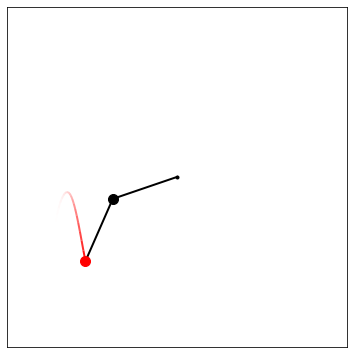

In [181]:
# plot one point in time
i = 100

r = 0.5
ns = 20
trail_secs = 1
    
fig = plt.figure(figsize=(8.3333, 6.25), dpi=72)
ax = fig.add_subplot(111)

# hanging point
c0 = ax.plot(0,0,'o',markersize=3,color='black')

# pendolum arms
ax.plot([0, x1[i], x2[i]], [0, y1[i], y2[i]], lw=2, c='k')

# moving masses
c1 = ax.plot(x1[i],y1[i],'o',markersize=10,color='black')
c2 = ax.plot(x2[i],y2[i],'o',markersize=10,color='red')

# Trail of m2 will be divided into ns segments and plotted as a fading line
s = int(trail_secs / dt) // ns
for j in range(ns):
    imin = i - (ns-j)*s
    if imin < 0: continue
    imax = imin + s + 1
    alpha = (j/ns)**2
    ax.plot(x2[imin:imax], y2[imin:imax], c='r', solid_capstyle='butt',lw=2, alpha=alpha)

ax.set_xlim(-L1-L2-r, L1+L2+r)
ax.set_ylim(-L1-L2-r, L1+L2+r)
ax.set_aspect('equal', adjustable='box')
#plt.axis('off')
plt.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)
plt.show()

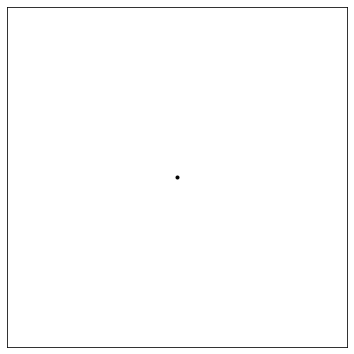

In [182]:
fig = plt.figure(figsize=(8.3333, 6.25), dpi=72)
ax = fig.add_subplot(111)

# hanging point
c0 = ax.plot(0,0,'o',markersize=3,color='black')

# pendolum arms
lines, = ax.plot([], [], lw=2, c='k')

# moving masses
c1, = ax.plot([],[],'o',markersize=10,color='black')
c2, = ax.plot([],[],'o',markersize=10,color='red')

# m2 trail
s = int(trail_secs / dt) // ns
trail = []
for j in range(ns):
    imin = i - (ns-j)*s
    if imin < 0: continue
    imax = imin + s + 1
    alpha = (j/ns)**2
    trail_j, = ax.plot([],[], c='r', solid_capstyle='butt',lw=2, alpha=alpha)
    trail.append(trail_j)

ax.set_xlim(-L1-L2-r, L1+L2+r)
ax.set_ylim(-L1-L2-r, L1+L2+r)
ax.set_aspect('equal', adjustable='box')
#plt.axis('off')
plt.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)
plt.show()

In [169]:
from matplotlib.animation import FuncAnimation
%matplotlib inline
from IPython.display import HTML, Image

def pendolum_init():
    lines.set_data([], [])
    return (lines,)

def pendolum_animate(i):
    lines.set_data([0,x1[i],x2[i]],[0,y1[i],y2[i]])
    c1.set_data([x1[i]],[y1[i]])
    c2.set_data([x2[i]],[y2[i]])
    s = int(trail_secs / dt) // ns
    for j in range(ns):
        imin = i - (ns-j)*s
        if imin < 0: continue
        imax = imin + s + 1
        trail[j].set_data(x2[imin:imax],y2[imin:imax])
    return (lines,)

anim = FuncAnimation(fig,pendolum_animate,frames=range(len(x1)),init_func=pendolum_init,blit=True)

In [170]:
HTML(anim.to_html5_video())

In [173]:
anim.save('doublependolum.gif', writer='imagemagick', fps=20)

In [174]:
Image(url='doublependolum.gif')